In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Model Save/Load
import joblib

# Optional: Plot Style
sns.set_style('whitegrid')


In [2]:
# Load the train dataset
data = pd.read_csv("../data/raw/train_u6lujuX_CVtuZ9i.csv")

# Show first 5 rows
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Dataset shape (rows, columns)
print("Shape of dataset:", data.shape)

# Columns names
print("\nColumns in dataset:")
print(data.columns)

# Basic info (data types, missing values)
print("\nBasic Info:")
data.info()


Shape of dataset: (614, 13)

Columns in dataset:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='str')

Basic Info:
<class 'pandas.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    str    
 1   Gender             601 non-null    str    
 2   Married            611 non-null    str    
 3   Dependents         599 non-null    str    
 4   Education          614 non-null    str    
 5   Self_Employed      582 non-null    str    
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564

In [4]:
# Check missing values in each column
print("Missing values in each column:\n")
print(data.isnull().sum())


Missing values in each column:

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
# Categorical columns ke missing values mode (most frequent) se fill karna
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Numerical column ke missing values mean se fill karna
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_12012\2573621662.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12012\2573621662.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [6]:
# Confirm missing values
print("Missing values after cleaning:\n")
print(data.isnull().sum())

Missing values after cleaning:

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
# ✅ Missing Values Handling (Safe)
# Use .iloc[0] for mode to avoid KeyError
data['Gender'] = data['Gender'].fillna(data['Gender'].mode().iloc[0])
data['Married'] = data['Married'].fillna(data['Married'].mode().iloc[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode().iloc[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode().iloc[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode().iloc[0])

# Numerical column - use assignment instead of inplace
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

# ✅ Categorical Encoding
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})
data['Married'] = data['Married'].map({'Yes':1, 'No':0})
data['Education'] = data['Education'].map({'Graduate':1, 'Not Graduate':0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1, 'No':0})

# Dependents: '3+' ko 3 me convert aur int cast
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)

# One-hot encoding for Property_Area
data = pd.get_dummies(data, columns=['Property_Area'], drop_first=True)

# Target variable encoding
data['Loan_Status'] = data['Loan_Status'].map({'Y':1, 'N':0})

# ✅ Check first 5 rows
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,False,True
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,False,False
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,False,True
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,False,True
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,False,True


In [11]:
# Features (X) aur Target (y) separate karna
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (491, 12)
X_test shape: (123, 12)
y_train shape: (491,)
y_test shape: (123,)


In [12]:

from sklearn.ensemble import RandomForestClassifier
import joblib

# Random Forest initialize
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, "../rf_loan_model.pkl")
print("Random Forest model trained and saved successfully!")


Random Forest model trained and saved successfully!


In [13]:
# Load the saved model
loaded_model = joblib.load("../rf_loan_model.pkl")

# Test prediction on first 5 rows of test set
predictions = loaded_model.predict(X_test.head())
print("Predictions for first 5 test samples:", predictions)


Predictions for first 5 test samples: [1 1 1 1 1]


Accuracy of Random Forest model: 0.7642276422764228

Confusion Matrix:
 [[18 25]
 [ 4 76]]


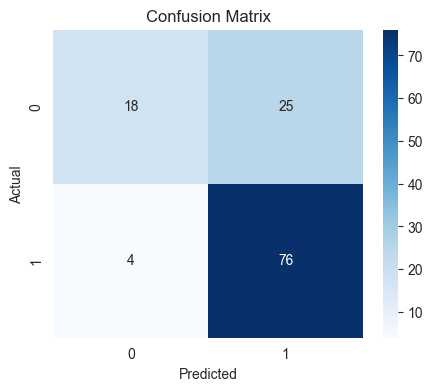

ROC-AUC Score: 0.7579941860465116


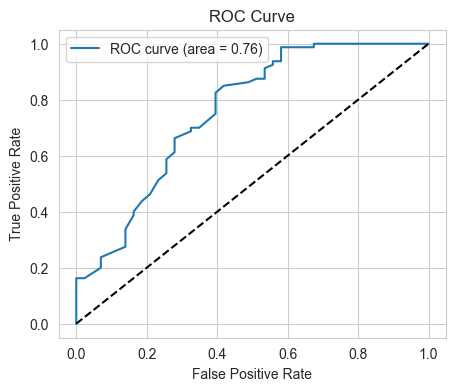

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on full test set
y_pred = loaded_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest model:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC
if hasattr(loaded_model, "predict_proba"):
    y_proba = loaded_model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_proba)
    print("ROC-AUC Score:", roc_auc)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression

# Fill any remaining NaN values in X_train and X_test
X_train = X_train.fillna(X_train.mean(numeric_only=True))
X_test = X_test.fillna(X_train.mean(numeric_only=True))

# Logistic Regression initialize
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression:", acc_lr)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix (Logistic Regression):\n", cm_lr)

# ROC-AUC
if hasattr(lr_model, "predict_proba"):
    y_proba_lr = lr_model.predict_proba(X_test)[:,1]
    roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
    print("ROC-AUC Score (Logistic Regression):", roc_auc_lr)


Accuracy of Logistic Regression: 0.7886178861788617

Confusion Matrix (Logistic Regression):
 [[18 25]
 [ 1 79]]
ROC-AUC Score (Logistic Regression): 0.7540697674418605


c:\loan prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
